## Лінійна регресія

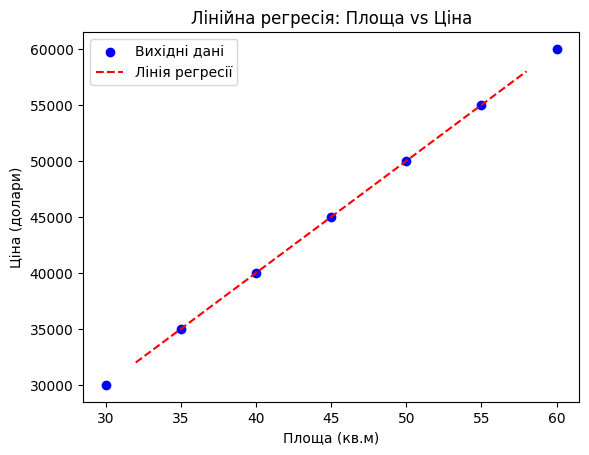

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([30, 35, 40, 45, 50, 55, 60]).reshape(-1, 1) # площа в квадратних метрах
y = np.array([30000, 35000, 40000, 45000, 50000, 55000, 60000]) # ціна в доларах

model = LinearRegression().fit(X, y) # навчання моделі

X_test = np.array([32, 38, 42, 48, 52, 58]).reshape(-1, 1) # тестові дані (площа в квадратних метрах)
y_pred = model.predict(X_test) # передбачені ціни

plt.scatter(X, y, color='blue', label='Вихідні дані') # вихідні дані
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Лінія регресії') # лінія регресії
plt.xlabel('Площа (кв.м)') # підпис осі X
plt.ylabel('Ціна (долари)') # підпис осі Y
plt.title('Лінійна регресія: Площа vs Ціна') # заголовок графіка
plt.legend() # оточення поля
plt.show() # показ графіка

# Гребінчаста регресія

Передбачені оцінки для нових учнів: [68.73157797 72.51115085 77.87321946 70.55024563 79.3922016 ]
Коефіцієнти моделі: [0.11048077 0.0317568  0.86997184]


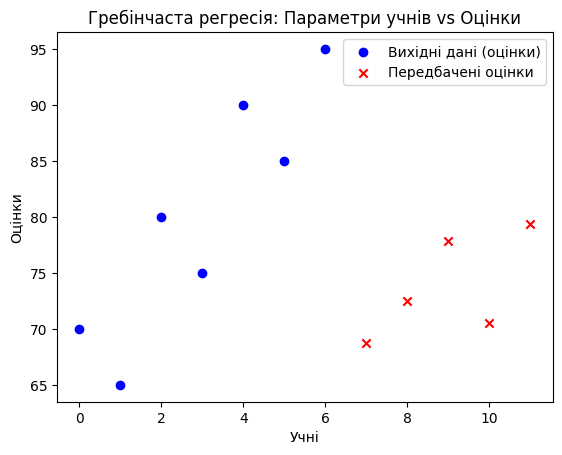

In [18]:
# Гребінчаста регресія (англ. Ridge Regression) / Ridge Regression
from sklearn.linear_model import Ridge

# Задаємо параметри навчання учнів у класі: кількість годин, вид спорту, кишенькові на тиждень та їхні оцінки
X = np.array([[5, 1, 20],
              [6, 0, 15],
              [7, 1, 30],
              [8, 0, 25],
              [9, 1, 40],
              [10, 0, 35],
              [11, 1, 50]]) # [години навчання, вид спорту (1 - активний, 0 - пасивний), кишенькові на тиждень]

y = np.array([70, 65, 80, 75, 90, 85, 95]) # оцінки учнів

model = Ridge(alpha=1.0).fit(X, y) # навчання моделі гребінчастої регресії
# alpha - параметр регуляризації (чим більше значення, тим сильніше регуляризація)
# Регуляризація допомагає уникнути перенавчання моделі, особливо коли є багато вхідних змінних

# Тестові дані: нові учні з різними параметрами
X_test = np.array([[6, 1, 18],
                   [9, 0, 22],
                   [10, 1, 28],
                   [7, 0, 20],
                   [8, 1, 30]]) # нові учні
y_pred = model.predict(X_test) # передбачені оцінки для нових учнів
print("Передбачені оцінки для нових учнів:", y_pred)
# Коофіцієнти моделі
print("Коефіцієнти моделі:", model.coef_)
# Візуалізація результатів
plt.scatter(range(len(y)), y, color='blue', label='Вихідні дані (оцінки)') # вихідні дані
plt.scatter(range(len(y), len(y) + len(y_pred)), y_pred, color='red', marker='x', label='Передбачені оцінки') # передбачені оцінки
plt.xlabel('Учні') # підпис осі X
plt.ylabel('Оцінки') # підпис осі Y
plt.title('Гребінчаста регресія: Параметри учнів vs Оцінки') # заголовок графіка
plt.legend() # оточення поля
plt.show() # показ графіка

# Стовбчаста діаграма

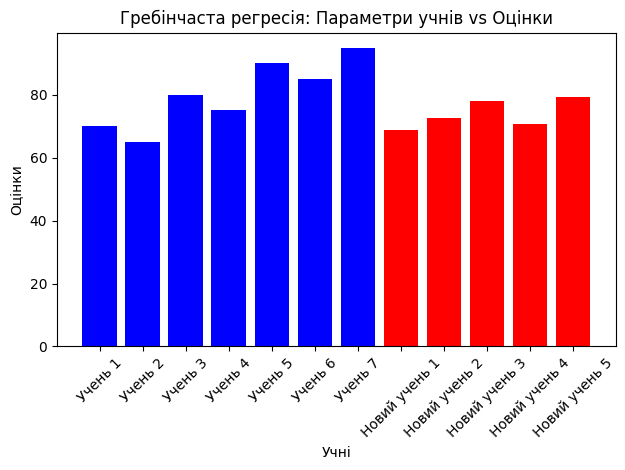

In [15]:
labels = [f'Учень {i+1}' for i in range(len(y))] + [f'Новий учень {i+1}' for i in range(len(y_pred))]
scores = np.concatenate([y, y_pred])
x = np.arange(len(labels))
plt.bar(x, scores, color=['blue']*len(y) + ['red']*len(y_pred))
plt.xticks(x, labels, rotation=45)
plt.xlabel('Учні') # підпис осі X
plt.ylabel('Оцінки') # підпис осі Y
plt.title('Гребінчаста регресія: Параметри учнів vs Оцінки') # заголовок графіка
plt.tight_layout() # щоб не обрізались підписи
plt.show() # показ графіка

## Lasso 

Коефіцієнти моделі: [ 0.01545354 -0.00377331  0.00024675]
Передбачені ціни для нових продуктів: [1.77354896 3.41796013 3.77246322 2.3619033  4.25556405]


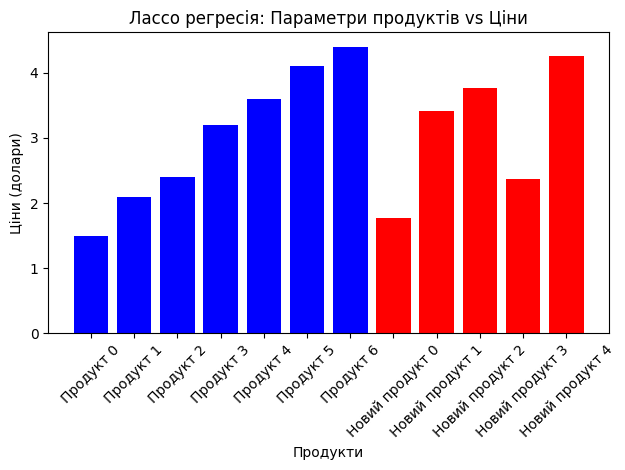

In [25]:
from sklearn.linear_model import Lasso

# Вхідні дані: [вага (г), калорійність (ккал), кількість інгредієнтів]
X = np.array([[100, 250, 5],
              [150, 300, 75],
              [200, 400, 10],
              [250, 450, 19],
              [300, 500, 15],
              [350, 600, 18],
              [400, 700, 20]]) # [вага (г), калорійність (ккал), кількість інгредієнтів]

# y = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]) # ціни в доларах
# random noise
y = np.array([1.5, 2.1, 2.4, 3.2, 3.6, 4.1, 4.4]) # ціни в доларах з шумом

model = Lasso(alpha=0.1).fit(X, y) # навчання моделі лассо регресії
# alpha - параметр регуляризації (чим більше значення, тим сильніше регуляризація)

# результати
print("Коефіцієнти моделі:", model.coef_)


# Тестові дані: нові продукти з різними параметрами
X_test = np.array([[120, 260, 6],
                   [280, 480, 14],
                   [320, 550, 16],
                   [180, 350, 9],
                   [400, 750, 22]]) # нові продукти

y_pred = model.predict(X_test) # передбачені ціни для нових продуктів

print("Передбачені ціни для нових продуктів:", y_pred)

# Візуалізація результатів
labels = [f'Продукт {i}' for i in range(len(y))] + [f'Новий продукт {i}' for i in range(len(y_pred))]
scores = np.concatenate([y, y_pred])
x = np.arange(len(labels))
plt.bar(x, scores, color=['blue']*len(y) + ['red']*len(y_pred))
plt.xticks(x, labels, rotation=45)
plt.xlabel('Продукти') # підпис осі X
plt.ylabel('Ціни (долари)') # підпис осі Y
plt.title('Лассо регресія: Параметри продуктів vs Ціни') # заголовок графіка
plt.tight_layout() # щоб не обрізались підписи
plt.show() # показ графіка